Figure 3.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# Importing the dataset
advert = pd.read_csv("/content/drive/MyDrive/IITB/CSV Files/advertising.csv.xls")

In [ ]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

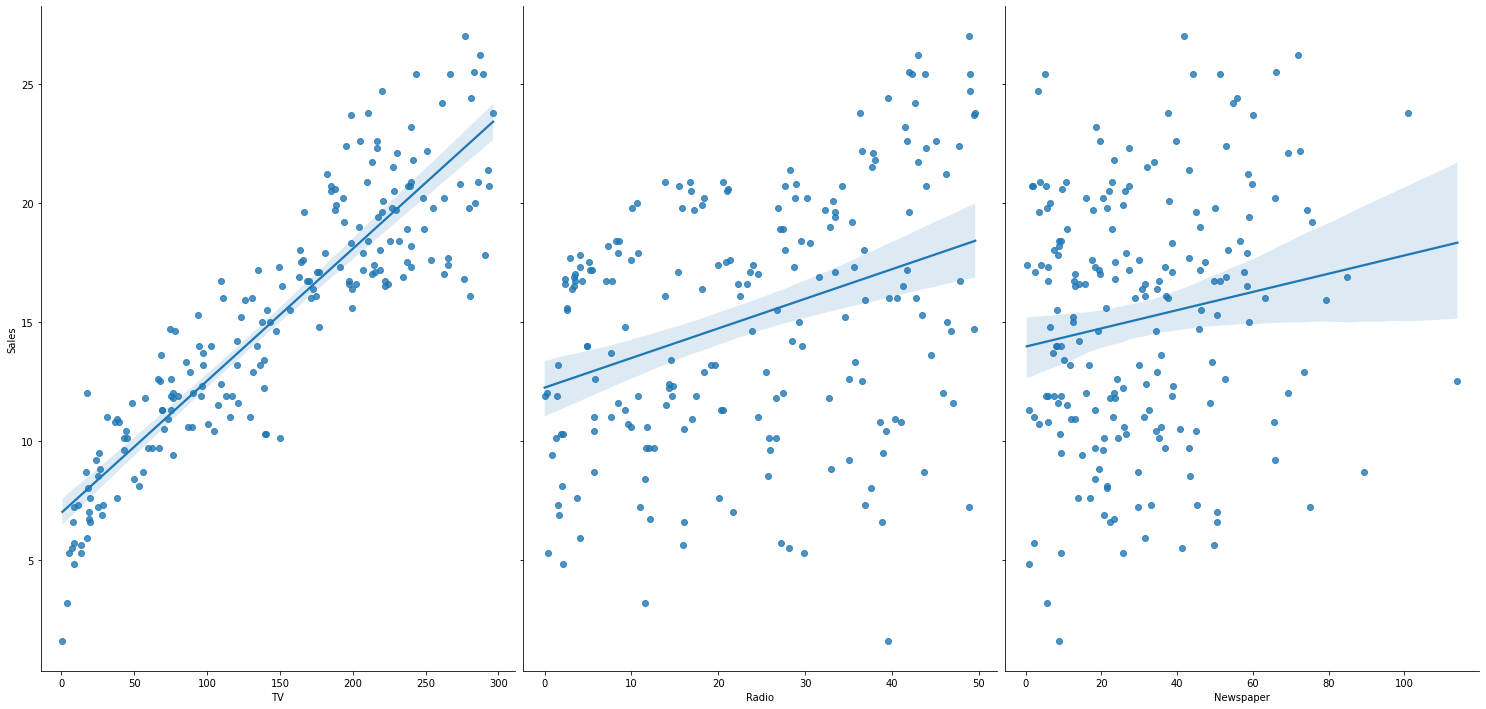

In [ ]:
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'],
             y_vars='Sales', height=10, aspect=0.7, kind='reg')

In [ ]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
y = advert.Sales
print(y.shape)

(200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(linreg.coef_) 
print(linreg.intercept_)

[0.05565473]
6.902718095764663


In [ ]:
y_pred = linreg.predict(X_test)
y_pred[:5]

array([18.63473515, 18.17280089, 12.22887574, 22.4971734 , 21.02788853])

In [ ]:
# Model Evaluation
from sklearn import metrics

# Mean Absolute Error
print(metrics.mean_absolute_error(y_test, y_pred))

1.839265847150204


In [ ]:
# Mean Squared Error
print(metrics.mean_squared_error(y_test, y_pred))

5.091667103207963


In [ ]:
# Root Mean Squared Error
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.2564722695411


Figure 3.3

Enter the No. Of values you want
Enter the maximum value you want


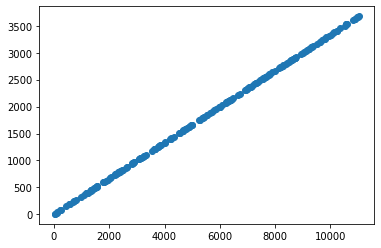

In [ ]:
#@title Regression { run: "auto", vertical-output: true }

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
print("Enter the No. Of values you want")
Limit = 210 #@param {type:"slider", min:0, max:1000, step:1}
print("Enter the maximum value you want")
MaximumValue = 3705 #@param {type:"slider", min:0, max:10000, step:1}
list=[]
for x in range(0,Limit):
    list.append(random.randint(0, MaximumValue))
c=random.uniform(0, 1)
y=[]
for x in range(0,Limit):
  y.append(2+3*list[x]+c)
plt.scatter(y,list)
plt.show()

Figure 3.6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IITB/CSV Files/Credit (1).csv')
x = data['Balance']
y = data['Age']

In [ ]:
print(data.head())

   Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331  


In [ ]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [ ]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

In [ ]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

In [ ]:
B0 = y_mean - (B1 * x_mean)

In [ ]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [ ]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 55.631695783033926 + 0.0β
Correlation Coef.:  0.0018351188590736876
"Goodness of Fit":  3.367661226927913e-06


AttributeError: ignored

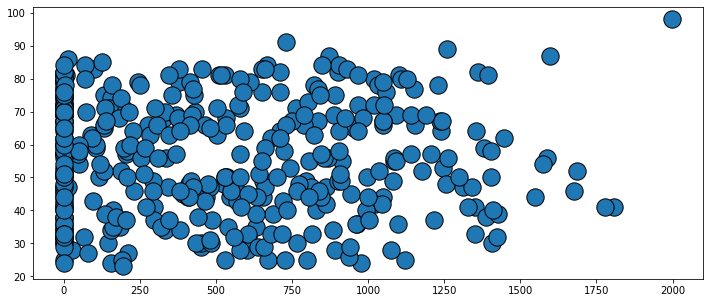

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Age
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=100000, s=text, fontsize=12, bbox={'Balance': 'Age', 'alpha': 0.2, 'pad': 10})
plt.title('Balance vs age')
plt.xlabel('Balance', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') 

In [ ]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

Figure 3.8 / Polynomial Regression on auto dataset 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Importing the dataset
datas = pd.read_csv('/content/drive/MyDrive/IITB/CSV Files/auto-mpg.csv')
datas

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

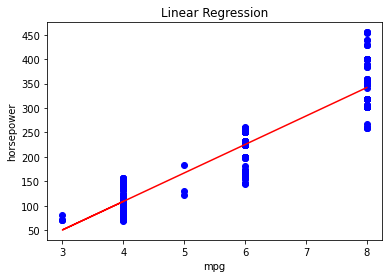

In [ ]:
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('mpg')
plt.ylabel('horsepower')
 
plt.show()

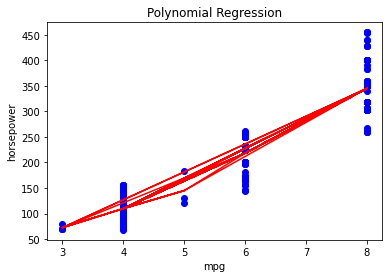

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('mpg')
plt.ylabel('horsepower')
 
plt.show()

In [ ]:
#Linear Regression
pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)

array([6286.13961879])

In [ ]:
# Polyn
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([-2.94852883e+08])